# YELP dataset
From the [website](https://www.yelp.com/dataset)

> The Yelp dataset is a subset of our businesses, reviews, and user data for use in connection with academic research. Available as JSON files, use it to teach students about databases, to learn NLP, or for sample production data while you learn how to make mobile apps.

Provides about **7.000.000 reviews** on **150.000 business activitites** in **11 metropolitan areas** mainly across the USA.

We are going to use a subset of those data stored locally (not available on GitHub). The full dataset can be downloaded [here](https://www.yelp.com/dataset).

In [1]:
import pandas as pd 
import yelp.loader as ld 

In [2]:
yelp = ld.load_sample()

## Introduction to the Vector Space Model

**Categories as features**

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
docs = []
for doc in yelp:
    docs.append(dict([(c, 1) for c in doc['categories']]))
X = pd.DataFrame(docs).fillna(0)

In [5]:
X.head()

,American (Traditional),Burgers,Restaurants,Himalayan/Nepalese,Indian,Bars,Beer,Food,Italian,Nightlife,...,Septic Services,Japanese Curry,Furniture Reupholstery,Siding,Screen Printing,Snow Removal,Private Investigation,Tai Chi,Ski Resorts,Vacation Rental Agents
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
S = X[X.columns[:2]]

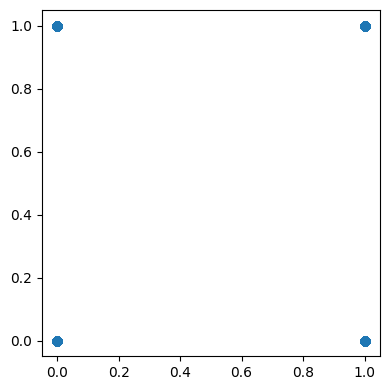

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(S['American (Traditional)'], S['Burgers'])
plt.tight_layout()
plt.show()

**Tokenization**

In [8]:
from collections import Counter

In [9]:
docs, limit = [], 2_000
for doc in yelp[:limit]:
    text = doc['content']
    tokens = text.split()
    docs.append(dict(Counter(tokens).most_common()))
X = pd.DataFrame(docs).fillna(0)
y = [y['stars'] for y in yelp[:limit]]

In [10]:
X.head()

,and,a,great,the,was,with,hit,of,side,this,...,palette,(Makers,fav),Church!,yolk.,"""E""",Makers,Maine,Gin,Gimlet
0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
X.loc[0].sort_values(ascending=False).head(50)

and           3.0
great         3.0
the           3.0
a             3.0
of            2.0
side          2.0
this          2.0
hit           2.0
with          2.0
was           2.0
on            1.0
always        1.0
too           1.0
lots          1.0
dish          1.0
options       1.0
kiddos!       1.0
When          1.0
I'm           1.0
spot          1.0
town,         1.0
will          1.0
definitely    1.0
be            1.0
pizza         1.0
I'll          1.0
up            1.0
again!        1.0
is            1.0
for           1.0
Kids          1.0
This          1.0
temps!        1.0
white         1.0
bleu          1.0
salad         1.0
super         1.0
addition      1.0
to            1.0
menu!         1.0
yum           1.0
location      1.0
service       1.0
Red,          1.0
food          1.0
served        1.0
at            1.0
just          1.0
clean         1.0
right         1.0
Name: 0, dtype: float64

**Tools for tokenization**

In [12]:
from nltk.tokenize import word_tokenize
import spacy

In [ ]:
nlp = spacy.load('en_core_web_lg')

**nltk word_tokenize**

In [16]:
documents = [x['content'] for x in yelp]

In [22]:
all_tokens = [word_tokenize(d) for d in documents[:limit]]
matrix = []
for tokens in all_tokens:
    bow = dict(Counter(tokens).most_common())
    matrix.append(bow)
W = pd.DataFrame(matrix).fillna(0)


In [23]:
W

,!,and,a,great,the,",",was,with,hit,of,...,Omar,Church,yolks,Makers,Googling,Yelping,palette,Maine,Gin,Gimlet
0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,3.0,4.0,1.0,1.0,0.0,3.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,5.0,5.0,0.0,5.0,6.0,3.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,3.0,3.0,2.0,0.0,7.0,3.0,4.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,3.0,2.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**SpaCy**

In [24]:
nlp = spacy.load('en_core_web_lg')

In [30]:
doc_s = nlp(documents[0])
for i, token in enumerate(doc_s):
    print(token.text, token.idx, token.pos_)
    if i > 5:
        break
    

Red 0 ADJ
, 3 PUNCT
white 5 ADJ
and 11 CCONJ
bleu 15 PROPN
salad 20 NOUN
was 26 AUX


In [41]:
all_tokens = [nlp(d) for d in documents[:limit]]
y = [d['stars'] for d in yelp[:limit]]
matrix = []
for tokens in all_tokens:
    bow = dict(Counter([x.text for x in tokens]).most_common())
    matrix.append(bow)
S = pd.DataFrame(matrix).fillna(0)

In [42]:
y[:4]

[4, 4, 5, 5]

In [32]:
S

,!,and,a,great,the,",",was,with,hit,of,...,Omar,Church,yolks,Makers,Googling,Yelping,palette,Maine,Gin,Gimlet
0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,3.0,4.0,1.0,1.0,0.0,3.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,5.0,5.0,0.0,5.0,6.0,3.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,3.0,3.0,2.0,0.0,7.0,3.0,4.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,3.0,2.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Visualize**

In [33]:
from sklearn.manifold import TSNE 

In [36]:
tsne = TSNE(n_components=2)
X2d = tsne.fit_transform(X)
S2d = tsne.fit_transform(S)

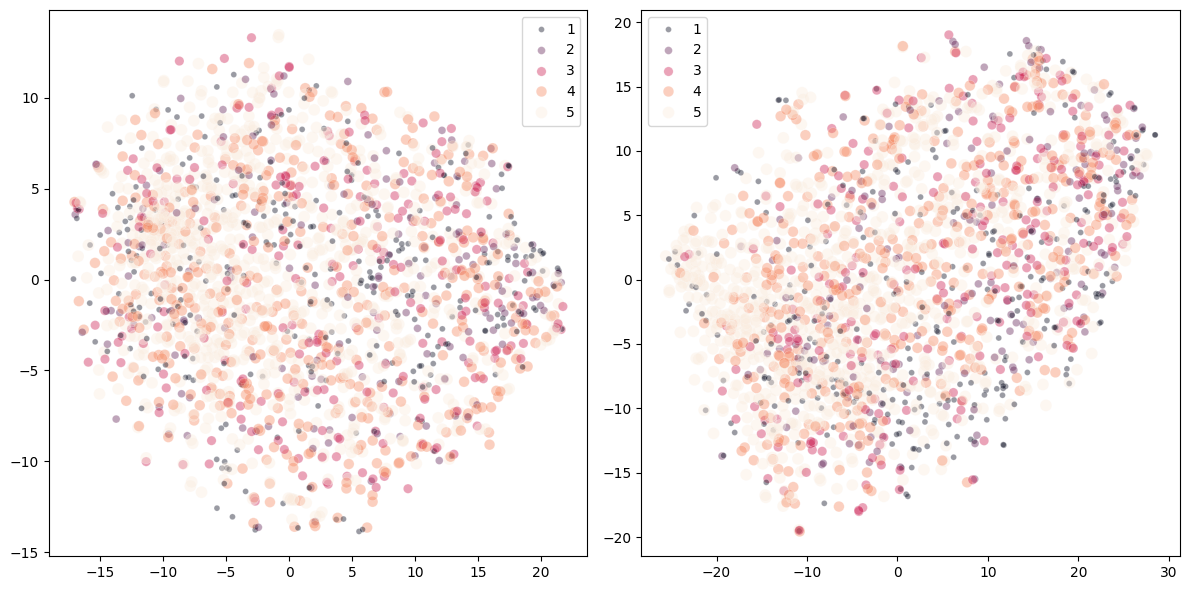

In [39]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
sns.scatterplot(x=X2d[:,0], y=X2d[:,1], ax=ax[0], alpha=.4, hue=y, palette="rocket", size=y)
sns.scatterplot(x=S2d[:,0], y=S2d[:,1], ax=ax[1], alpha=.4, hue=y, palette="rocket", size=y)
plt.tight_layout()
plt.show()

**Try classification**

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [73]:
classifiers = [RandomForestClassifier(), MultinomialNB()]
results = []
for classifier in classifiers:
    classifier.fit(S.to_numpy(), y)
    out = classifier.predict(S.to_numpy())
    results.append(out)

**Evaluate**

In [74]:
all_tokens = [nlp(d) for d in documents[limit:limit+1_000]]
y_test = [d['stars'] for d in yelp[limit:limit+1_000]]
vocabulary = set(S.columns)
matrix = np.zeros((len(all_tokens), len(vocabulary)))
S_test = pd.DataFrame(matrix, columns=list(vocabulary))
for i, tokens in enumerate(all_tokens):
    bow = dict([(x, y) for x, y in Counter([x.text for x in tokens]).most_common() if x in vocabulary])
    for w, s in bow.items():
        S_test.iloc[i][w] = s

In [75]:
S_test.head(2)

,worthy,Say,serves,simply,wonton,locale,slate,bitchy,Organo,extremely,...,cafeteria,VERY,hotwire,kobe,responsive,understaffed,Kabocha,Done,rent,dripped
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
test = [k.predict(S_test.to_numpy()) for k in classifiers]

In [68]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, test[0], zero_division=0))
print(classification_report(y_test, test[1], zero_division=0))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       137
           2       0.00      0.00      0.00        77
           3       0.00      0.00      0.00       108
           4       0.00      0.00      0.00       262
           5       0.42      1.00      0.59       416

    accuracy                           0.41      1000
   macro avg       0.08      0.20      0.12      1000
weighted avg       0.17      0.41      0.24      1000

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       137
           2       0.08      0.99      0.15        77
           3       0.04      0.02      0.03       108
           4       0.00      0.00      0.00       262
           5       0.00      0.00      0.00       416

    accuracy                           0.08      1000
   macro avg       0.02      0.20      0.03      1000
weighted avg       0.01      0.08      0.01      1000



**Normalize lexicon and reduce variance**

In [83]:
from spacy.displacy import render

In [82]:
doc_s = nlp(documents[0])
for i, token in enumerate(doc_s):
    print(token.text, token.idx, token.pos_, token.lemma_, token.dep_)
    if i > 10:
        break

Red 0 ADJ red amod
, 3 PUNCT , punct
white 5 ADJ white conj
and 11 CCONJ and cc
bleu 15 PROPN bleu conj
salad 20 NOUN salad nsubj
was 26 AUX be ROOT
super 30 ADJ super advmod
yum 36 NOUN yum attr
and 40 CCONJ and cc
a 44 DET a det
great 46 ADJ great amod


In [84]:
render(doc_s)

**Weighting scheme**

**Resources**

In [13]:
from nltk.corpus import wordnet as wn